<a href="https://colab.research.google.com/github/GBaroni/GBaroni-github.io/blob/master/Geriatric_Colony_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Importing Modules
import pandas as pd
import numpy as np
import operator
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

In [ ]:
### Mount GDrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Loading the Excel files into DBs

df = pd.read_excel(r'drive/My Drive/Roundups-March-2024.xlsx')
brain_df = pd.read_excel(r'drive/My Drive/List of Geriatric Animals - Mar 2024.xlsx')
genotype_df = pd.read_excel(r'drive/My Drive/Genotyped Animal Numbers 2023.xlsx')
diabetic_df = pd.read_excel(r'drive/My Drive/CNPRC Diabetic Data March-2024.xlsx')

In [ ]:
###Turning the panda db into a dictionary with each animal number as the key and each value as a list containing the follow information:
# Index 0: String indicating the sex of the animal (F/M)
# Index 1: Timestamp corresponding to the Date of Birth
# Index 2: List of biofluid collection dates (timestamps)
# Index 3: List containing the number of CSF tubes obtained in each collection
# Index 4: List containing the estimated volume of CSF obtained in each collection
# Index 5: List containing the number of Plasma tubes
# Index 6: List containing the age of the animal at each collection
# Index 7: Int indicating the total number of CSF collections
# Index 8: Int indicating the total number of Plasma collections

#Dictionary initialization
animal_list = {}

#Iterating over the dataframe to extract information and populate it in Indexes 0-5 in the animal_list dictionary
for i in range(len(df)):
    if df.iloc[i][0] not in animal_list: #Creating a new dictionary entry if an animal is encountered for the first time
        animal_list[df.iloc[i][0]] = [df.iloc[i][1], df.iloc[i][2], [df.iloc[i][4]], [df.iloc[i][7]], [df.iloc[i][8]], [df.iloc[i][10]], []]
    else: #adding collection information to a pre-existing dictionary entry
        animal_list[df.iloc[i][0]][2].append(df.iloc[i][4])  #Collection date
        animal_list[df.iloc[i][0]][3].append(df.iloc[i][7])  #CSF tubes collected
        animal_list[df.iloc[i][0]][4].append(df.iloc[i][8])  #CSF volume collected
        animal_list[df.iloc[i][0]][5].append(df.iloc[i][10]) #Plasma tubes collected

#Calculating the age at each collection, in years + two decimals, based on the date of the collection and the date of birth, and populating Index 6 of the Dictionary
for key, value in animal_list.items():
    for i in range(len(value[2])):
        delta = (value[2][i]-value[1])/pd.Timedelta('365 days')
        value[6].append(round(delta, 2))

#Calculating the total number of CSF and plasma collections by eliminating entries that yielded 0 tubes, and then populating Indexes 7 and 8 of the dictionary, respectively
for key, value in animal_list.items():
    CSF_counter = 0
    Plasma_counter = 0
    for i in range(len(value[3])):
        if value[3][i] > 0:
            CSF_counter +=1
    value.append(CSF_counter)
    for j in range(len(value[5])):
        if value[5][j] > 0:
            Plasma_counter +=1
    value.append(Plasma_counter)

#Checking dictionary integrity
#for keys,values in sorted(animal_list.items(), key=operator.itemgetter(1))[:5]:
    #print (keys,values)

In [ ]:
###Turning the panda db into a dictionary with each animal number as the key and each value as a list containing the follow information:
#Index 0: String indicating the sex of the animal (M/F)
#Index 1: Timestamp indicating the Date of Birth
#Index 2: Timestamp indicating the Euthanasia Date
#Index 3: Float indicating the age of the animal at death, rounded to two decimal points
#Index 4: String (Y/N) indicating if the animal has thick sections available
#Index 5: String (Y/N) indicating if the animal has vibratome sections available
#Index 6: String (Y/N) indicating if the animal has microtomed sections available
#Index 7: String (Y/N) indicating the animal has a frozen hemisphere available
#Index 8: List of strings indicating the availability of frozen punches, following this order:
        #Index0:PFC
        #Index1:OFC
        #Index2:Anterior Cingulate
        #Index3:Perirhinal
        #Index4:STS
        #Index5:V1
        #Index6:Cerebellum
#index 9: String indicating the availability of terminal collection samples

#Dictionary intialization
brain_list = {}

#Iterating over the list of geriatric animals with brain collections to populate the dictionary
for i in range(len(brain_df)):
    brain_list[brain_df.iloc[i][0]] = [brain_df.iloc[i][1], brain_df.iloc[i][3], brain_df.iloc[i][5]]

#Adding the age at death for each animal
for k, v in brain_list.items():
    v.append(round((v[2]-v[1])/pd.Timedelta('365 days'),2))

#Adding the availability of Thick Session to each animal
for i in range(len(brain_df)):
    if brain_df.iloc[i][12] is not np.nan:
       brain_list[brain_df.iloc[i][0]].append("Y")
    else:
       brain_list[brain_df.iloc[i][0]].append("N")

#Adding the availability of vibratome sections
for i in range(len(brain_df)):
    if brain_df.iloc[i][13] is not np.nan and brain_df.iloc[i][13] !="None" and brain_df.iloc[i][13] !="none":
       brain_list[brain_df.iloc[i][0]].append("Y")
    else:
       brain_list[brain_df.iloc[i][0]].append("N")

#Adding the availability of microtome sections
for i in range(len(brain_df)):
    if brain_df.iloc[i][14] is not np.nan and brain_df.iloc[i][14] !="None" and brain_df.iloc[i][14] !="none":
       brain_list[brain_df.iloc[i][0]].append("Y")
    else:
       brain_list[brain_df.iloc[i][0]].append("N")

#Adding the availability of frozen hemisphere:
for i in range(len(brain_df)):
    if brain_df.iloc[i][15] is not np.nan:
       brain_list[brain_df.iloc[i][0]].append("Y")
    else:
       brain_list[brain_df.iloc[i][0]].append("N")

#Adding the availability of frozen punches:
for i in range(len(brain_df)):
    container = []
    for j in brain_df.iloc[i][16:22]:
        if j is not np.nan:
            container.append("Y")
        else:
            container.append("N")
    brain_list[brain_df.iloc[i][0]].append(container)

#Adding the availability of terminal collections:
for i in range(len(brain_df)):
    if brain_df.iloc[i][25] is not np.nan:
       brain_list[brain_df.iloc[i][0]].append("Y")
    else:
       brain_list[brain_df.iloc[i][0]].append("N")

#Checking dictionary integrity
#for keys,values in sorted(brain_list.items(), key=operator.itemgetter(1))[:5]:
    #print (keys,values)

In [ ]:
###For convenience, creating a separate list of animals that are present in both datasets

#List Initialization
overlap_list = []

#Iterating over the whole list of animals in the roundup dataframe and comparing to the brain dataframe
for k, v in animal_list.items():
    if k in brain_list:
        overlap_list.append(k)

#Checking list integrity
#print(overlap_list)

In [ ]:
###For convenience, creating a separate list of animals that are over 20 years of age

over20_list = []

#Iterating over the whole list of animals in the roundup dataframe

for k,v in animal_list.items():
    for age in v[6]:
        if age >= 20:
            over20_list.append(k)
            break

#Iterating over the whole list of animals in the brain dataframe

for k,v in brain_list.items():
    if v[3] >= 20 and v[3] not in over20_list:
        over20_list.append(k)

In [ ]:
######### Basic Brain Statistics #########

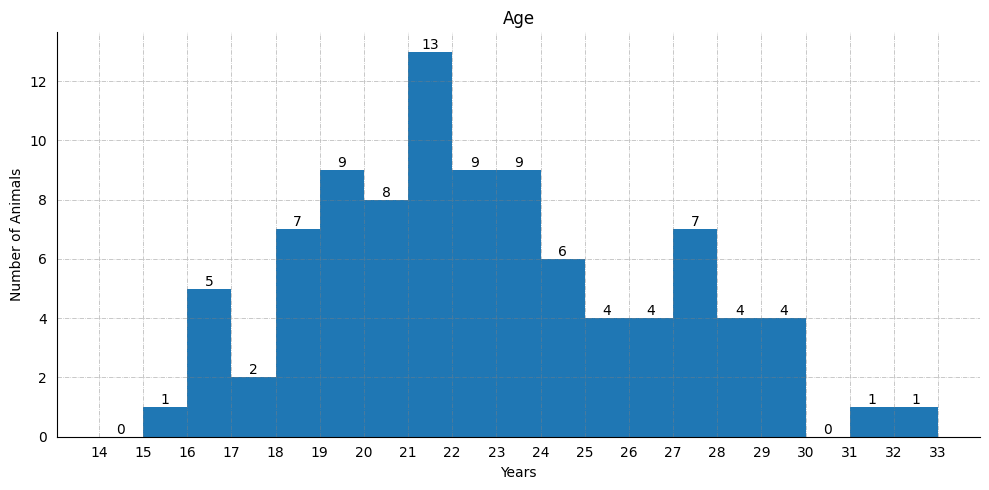

In [ ]:
### Age Histogram for Postmortem Animals

#Initializing the Plot
fig, axs = plt.subplots(1,1, figsize=(10,5), tight_layout=True)
plt.xlabel("Years")
plt.ylabel("Number of Animals")
plt.title("Age")

plt.xticks(np.arange(14,34,1))

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

#Calculate Distribution
ages = []

for k, v in brain_list.items():
    ages.append(v[3])

#Plot the histogram
counts, edges, bars = axs.hist(ages, bins=range(14,34), histtype='barstacked')

axs.bar_label(bars)
plt.savefig("Histogram of age at first collection.png", dpi=1200)
plt.show()

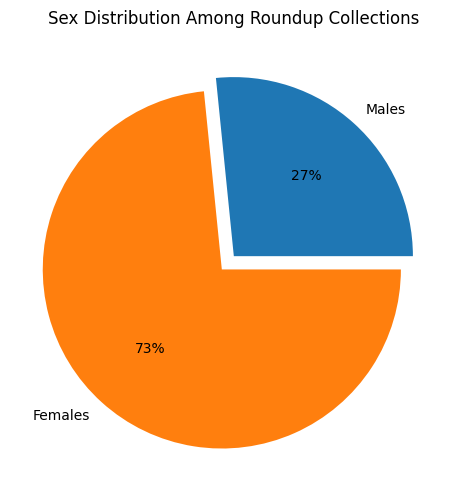

In [ ]:
### Sex Differences in Brain Samples

#Creating lists containing the animal numbers of females and males
females = []
males = []

for k,v in brain_list.items():
    if v[0] == "F":
        females.append(k)
    else:
        males.append(k)

#Initializing the Plot
fig, axs = plt.subplots(1,1, figsize=(5,5), tight_layout=True)
plt.title("Sex Distribution Among Roundup Collections")

labels = ["Males", "Females"]
data = [len(males), len(females)]

plt.pie(data, labels=labels, autopct='%1.0f%%', explode=(0,0.1))

plt.savefig("Sex distribution among collected samples.png", dpi=1200)
plt.show()

In [ ]:
######### Diabetic Data #########

#Dictionary initialization
diabetic_list = {}

#Iterating over the dataframe to extract information and populate it in Indexes 0-5 in the animal_list dictionary
for i in range(len(diabetic_df)):
    if diabetic_df.iloc[i][1] not in diabetic_list: #Creating a new dictionary entry if an animal is encountered for the first time
        diabetic_list[diabetic_df.iloc[i][1]] = []

for key in diabetic_list.keys():
  if key in animal_list.keys():
    diabetic_list[key].append(animal_list[key][7])
    diabetic_list[key].append(animal_list[key][8])

#print(diabetic_list)

#Counting the number of diabetic animals in the brain list
diabetic_brains = []

for k,v in brain_list.items():
  if k in diabetic_list:
    diabetic_brains.append(k)

print(len(diabetic_brains), diabetic_brains)

#retrieving information from the brain list

for i in diabetic_brains:
  print(brain_list[i])


5 [31908, 30665, 32233, 33748, 35938]
['F', Timestamp('1999-08-20 00:00:00'), Timestamp('2024-02-07 00:00:00'), 24.48, 'Y', 'N', 'N', 'Y', ['N', 'N', 'N', 'N', 'N', 'N'], 'Y']
['M', Timestamp('1998-03-19 00:00:00'), Timestamp('2021-11-18 00:00:00'), 23.68, 'N', 'N', 'N', 'N', ['N', 'N', 'N', 'N', 'N', 'N'], 'Y']
['M', Timestamp('2000-03-25 00:00:00'), Timestamp('2022-06-23 00:00:00'), 22.26, 'N', 'N', 'N', 'N', ['N', 'N', 'N', 'N', 'N', 'N'], 'Y']
['F', Timestamp('2002-03-11 00:00:00'), Timestamp('2023-07-28 00:00:00'), 21.39, 'Y', 'N', 'N', 'Y', ['N', 'N', 'N', 'N', 'N', 'N'], 'Y']
['F', Timestamp('2004-05-17 00:00:00'), Timestamp('2022-12-21 00:00:00'), 18.61, 'N', 'N', 'N', 'N', ['N', 'N', 'N', 'N', 'N', 'N'], 'Y']


In [ ]:
###Basic Statistics

#Calculates the number of Roundup animals that had at least on collection happen over the age of 20
roundups_over_20 = 0
for k,v in animal_list.items():
    for age in v[6]:
        if age>=20:
            roundups_over_20+=1
            break

#Calculates the number of brains from animals at least 20 years of age
brains_over_20 = 0
for k,v in brain_list.items():
    if v[3]>=20:
        brains_over_20+=1

#Calculates the number of animals that had both roundup collections and brain harvesting and that are older than 20 years of age
intersection_over_20 = 0
for i in overlap_list:
    if brain_list[i][3] >=20:
        intersection_over_20+=1

#Calculates the total number of collections made
individual_collections = 0
for k, v in animal_list.items():
    individual_collections+=len(v[2])

In [ ]:
#@markdown # 435 Plasma/CSF roundup collections from 195 different animals
#@markdown ## Ranging from 1 to 7 collections per animal

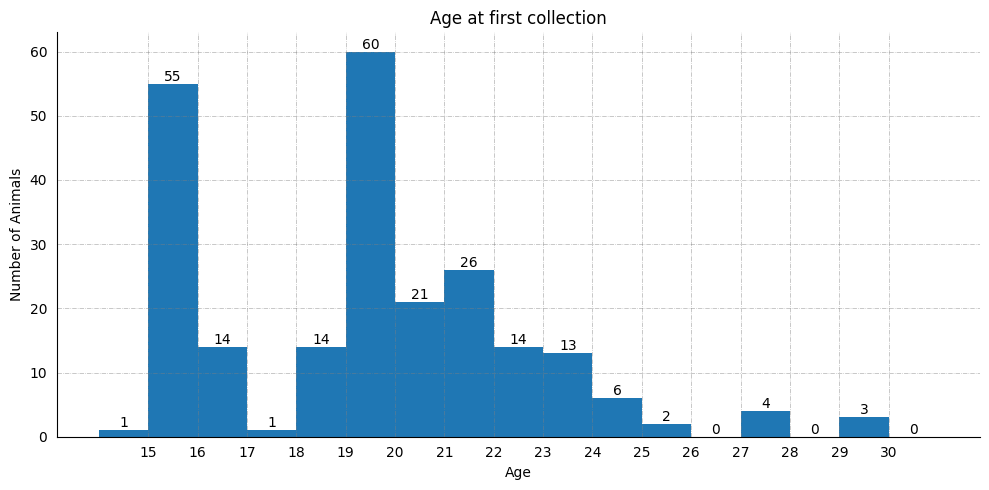

In [ ]:
### Showing the roundups by age

#Initializing the Plot
fig, axs = plt.subplots(1,1, figsize=(10,5), tight_layout=True)
plt.xlabel("Age")
plt.ylabel("Number of Animals")
plt.title("Age at first collection")

plt.xticks(np.arange(15,31,1))

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

#Calculate Distribution
age_at_first_collection = []

for k, v in animal_list.items():
    age_at_first_collection.append(v[6][0])

#Plot the histogram
counts, edges, bars = axs.hist(age_at_first_collection, bins=range(14,32), histtype='barstacked')

axs.bar_label(bars)
plt.savefig("Histogram of age at first collection.png", dpi=1200)
plt.show()

#Deprecated
#age_at_last_collection = []
#for k, v in animal_list.items():
#    age_at_last_collection.append(v[6][-1])

#Deprecated plt.hist(age_at_last_collection, bins=range(14, 32))

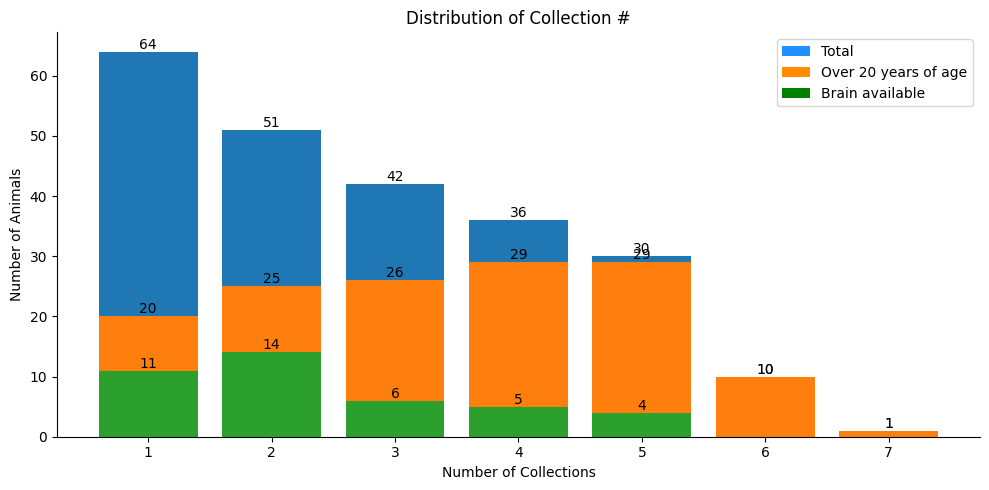

In [ ]:
### Showing the roundups by number of collections

#Initializing the Plot
fig, axs = plt.subplots(1,1, figsize=(10,5), tight_layout=True)
plt.xlabel("Number of Collections")
plt.ylabel("Number of Animals")
plt.title("Distribution of Collection #")

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

#Calculating Collection #s
col_number = []

for k,v in animal_list.items():
    col_number.append(len(v[6]))

#Calculating Collection #s for animals over20
col_20_number = []

for k,v in animal_list.items():
    if k in over20_list:
        col_20_number.append(len(v[6]))

#Calculating Collections #s for animals that overlap between the dataframes
col_overlap_number = []

for k,v in animal_list.items():
    if k in overlap_list:
        col_overlap_number.append(len(v[6]))

#Creating the Histograms
labels1, counts1 = np.unique(col_number, return_counts=True)
axs.bar(labels1, counts1, align='center', label='Total', color='dodgerblue')
plt.gca().set_xticks(labels1)

bars=axs.bar(labels1, counts1)
axs.bar_label(bars)

labels2, counts2 = np.unique(col_20_number, return_counts=True)
axs.bar(labels2, counts2, align='center', label='Over 20 years of age', color='darkorange')
plt.gca().set_xticks(labels2)

bars=axs.bar(labels2, counts2)
axs.bar_label(bars)

labels3, counts3 = np.unique(col_overlap_number, return_counts=True)
axs.bar(labels3, counts3, align='center', label='Brain available', color='green')
plt.gca().set_xticks(labels1)

bars=axs.bar(labels3, counts3)
axs.bar_label(bars)

axs.legend(loc='upper right')

plt.savefig("Distribution of serial collection numbers.png", dpi=1200)
plt.show()

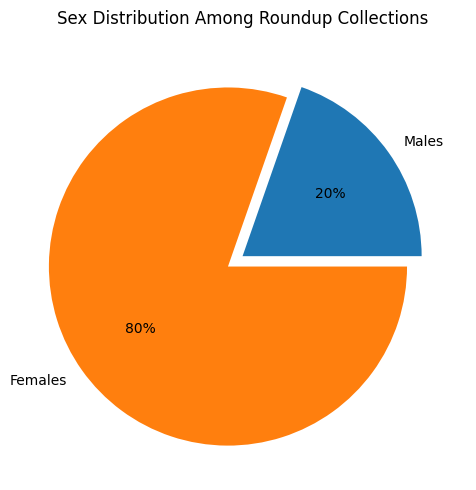

In [ ]:
###Visualizing Male vs Female Differences

#Creating lists containing the animal numbers of females and males
females = []
males = []

for k,v in animal_list.items():
    if v[0] == "F":
        females.append(k)
    else:
        males.append(k)

#Initializing the Plot
fig, axs = plt.subplots(1,1, figsize=(5,5), tight_layout=True)
plt.title("Sex Distribution Among Roundup Collections")

labels = ["Males", "Females"]
data = [len(males), len(females)]

plt.pie(data, labels=labels, autopct='%1.0f%%', explode=(0,0.1))

plt.savefig("Sex distribution among collected samples.png", dpi=1200)
plt.show()

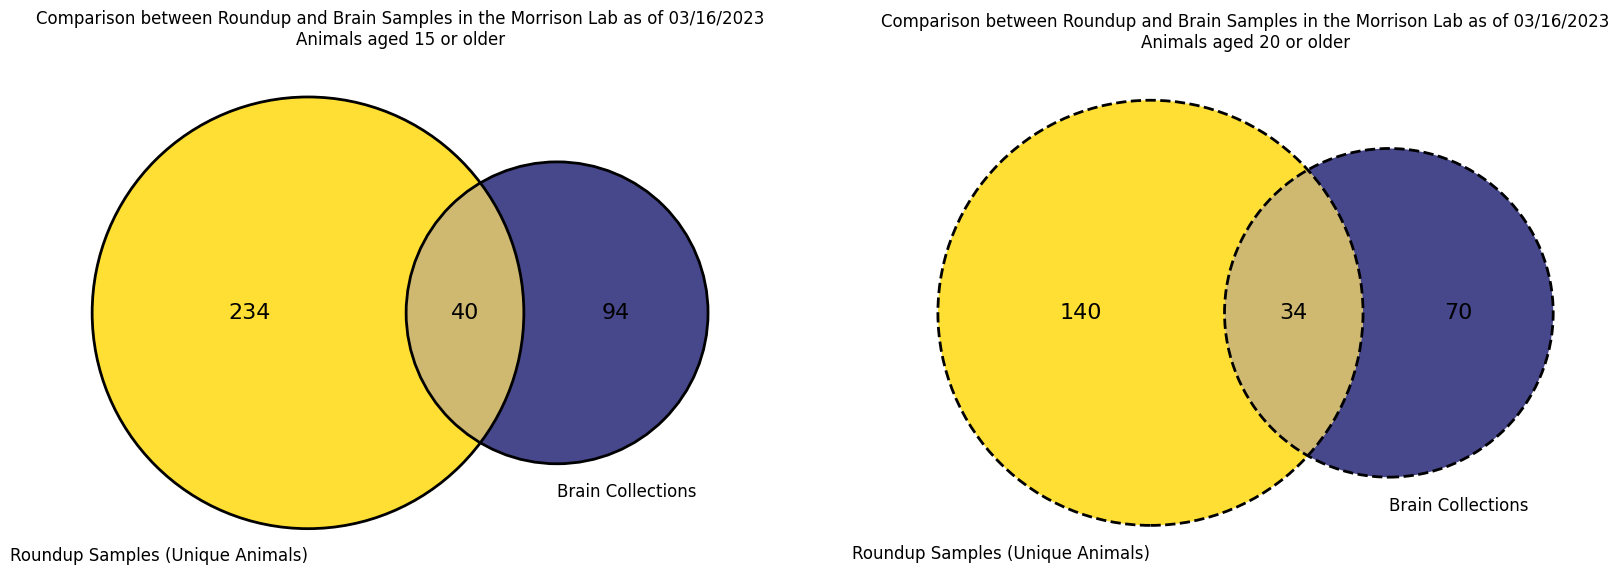

In [ ]:
#Initialize the Plot
a=plt.figure()
a.set_figwidth(20)
a.set_figheight(10)

#Create the Subplot that will show the Total number of animals
plt.subplot(1,2,1)

#Create the Venn Diagram object 'basic_overlap'
basic_overlap = venn2(subsets = (len(animal_list), len(brain_list), len(overlap_list)),
      set_labels = ('Roundup Samples (Unique Animals)', 'Brain Collections'),
     set_colors=("gold", "midnightblue"), alpha=0.8)

#Draw solid lines over the circles
venn2_circles(subsets = (len(animal_list), len(brain_list), len(overlap_list)))

#Increase font size for the number of animals
for text in basic_overlap.subset_labels:
    text.set_fontsize(16)

#Plot the venn diagram
plt.title("Comparison between Roundup and Brain Samples in the Morrison Lab as of 03/16/2023\n""Animals aged 15 or older")

#Create the Subplot that will show the number of animals over 20 years old
plt.subplot(1,2,2)

#Create the Venn Diagram object 'basic_overlap'
basic_overlap = venn2(subsets = (roundups_over_20, brains_over_20, intersection_over_20),
      set_labels = ('Roundup Samples (Unique Animals)', 'Brain Collections'),
     set_colors=("gold", "midnightblue"), alpha=0.8)

#Draw dashed lines over the circles
venn2_circles(subsets = (roundups_over_20, brains_over_20, intersection_over_20),
             linestyle='dashed')

#Increase font size for the number of animals
for text in basic_overlap.subset_labels:
    text.set_fontsize(16)

#Plot the venn diagram
plt.title("Comparison between Roundup and Brain Samples in the Morrison Lab as of 03/16/2023\n""Animals aged 20 or older")

plt.savefig("Venn Diagram of Roundup vs Terminal Samples aged 15 and older.png", dpi=1200)
plt.show()

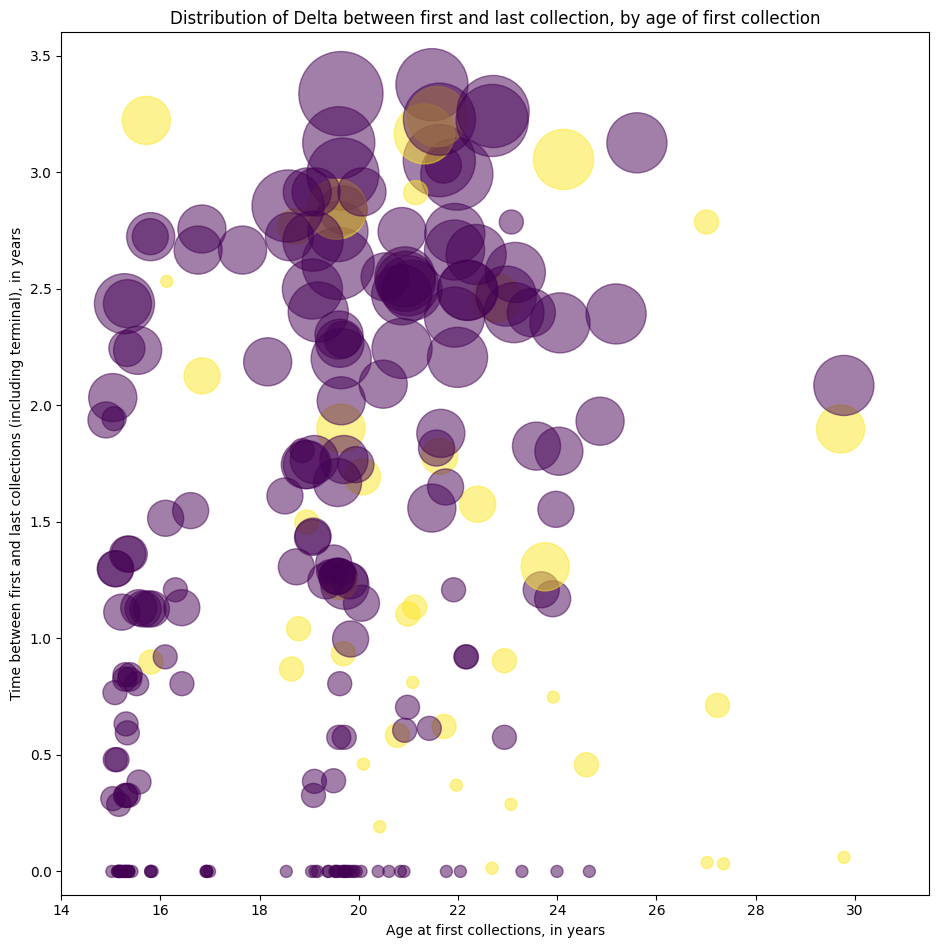

In [ ]:
X = []
Y = []
AREA = []
COLORS = []

counter = 0

for i in animal_list.keys():
    if col_number[counter] >= 0:
        if i in brain_list:
            z = (animal_list[i][2][0]-animal_list[i][1])/pd.Timedelta('365 days')
            X.append(z)
            Y.append((brain_list[i][2]-animal_list[i][1])/pd.Timedelta('365 days')-z)
            AREA.append(col_number[counter]**2*75)
            COLORS.append(1)
        else:
            z = (animal_list[i][2][0]-animal_list[i][1])/pd.Timedelta('365 days')
            X.append((animal_list[i][2][0]-animal_list[i][1])/pd.Timedelta('365 days'))
            Y.append((animal_list[i][2][-1]-animal_list[i][1])/pd.Timedelta('365 days')-z)
            AREA.append(col_number[counter]**2*75)
            COLORS.append(0)
    counter+=1

f, ax = plt.subplots(figsize=(6, 6))
ax.set(xlim=(14, 31.5), ylim=(-0.1, 3.6))
f.set_figwidth(11.2)
f.set_figheight(11.2)
plt.scatter(X, Y, s=AREA, c=COLORS, alpha=0.5)

plt.xlabel("Age at first collections, in years")
plt.ylabel("Time between first and last collections (including terminal), in years")
plt.title("Distribution of Delta between first and last collection, by age of first collection")

plt.savefig("Scatterplot of age at collection (X-axis), time between first and last collection(Y-axis), number of collections (circle size), and terminal status (yellow - collected, purple - alive).png", dpi=1200)
plt.show()

In [ ]:
pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=6901ce068fc12e789fd5570c88c5879cba176ac88b248bd116c618992f4cac3f
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [ ]:
from upsetplot import plot, from_indicators
from upsetplot import from_contents
from upsetplot import UpSet

In [ ]:
### Creating Lists based on properties

#Roundup
has_roundup = animal_list.keys()

#Brain
has_brain = brain_list.keys()

#Thick Sections
has_em = []
for k,v in brain_list.items():
    if v[4] == "Y":
        has_em.append(k)

#Vibratome Sections
has_vibratome = []
for k,v in brain_list.items():
    if v[5] == "Y":
        has_vibratome.append(k)

#Microtome Sections
has_microtome = []
for k,v in brain_list.items():
    if v[6] == "Y":
        has_microtome.append(k)

#Frozen Hemisphere
has_hemisphere = []
for k,v in brain_list.items():
    if v[7] == "Y":
        has_hemisphere.append(k)

#Frozen Punches
has_punches = []
for k,v in brain_list.items():
    for i in v[8]:
        if i == "Y":
            has_punches.append(k)
            break

#Terminal Collection
has_terminal = []
for k,v in brain_list.items():
    if v[9] == "Y":
        has_terminal.append(k)

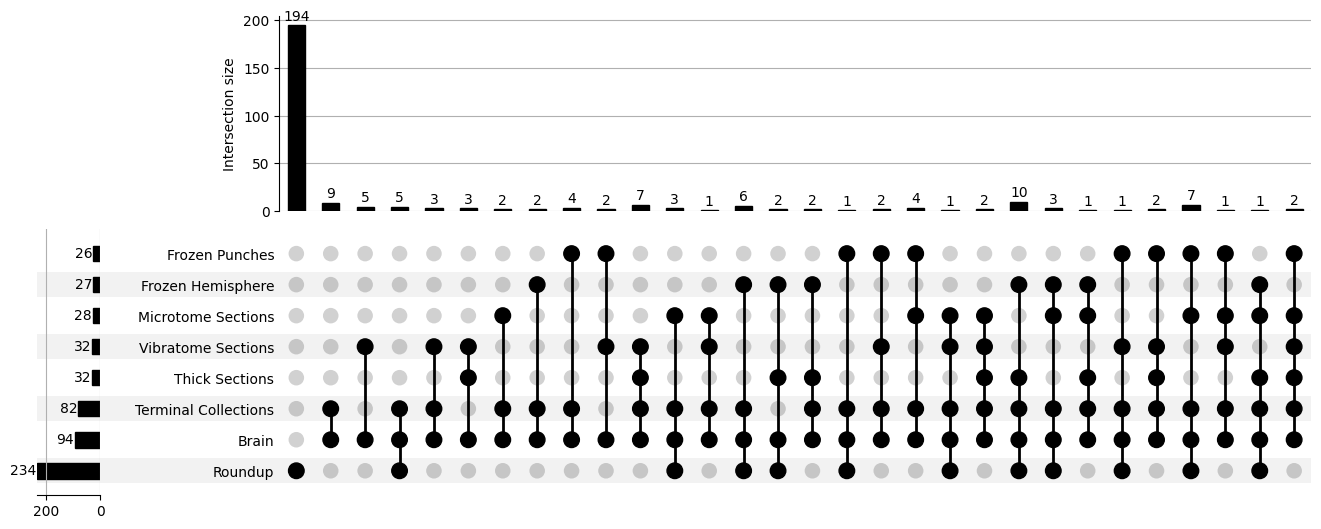

In [ ]:
animals = from_contents({'Roundup': has_roundup, 'Brain': has_brain, 'Thick Sections': has_em, 'Vibratome Sections': has_vibratome, 'Microtome Sections': has_microtome, 'Frozen Hemisphere': has_hemisphere, 'Frozen Punches': has_punches,
                         'Terminal Collections': has_terminal})

ax_dict = UpSet(animals, subset_size='count', show_counts=True).plot()

In [ ]:
for i in animal_list.keys():
  print(i)

30570
31775
32927
33048
46076
46100
28849
31619
32556
33077
33233
46102
25888
25914
31677
32957
33030
33775
31511
31985
32769
33342
46074
46103
34177
36175
36185
36339
30152
31908
31996
33104
33145
46118
46769
31562
31751
32107
32770
30861
31642
32665
33426
29726
31594
33867
36362
34354
36413
36457
36654
36844
35668
29995
33596
32288
29993
30318
31649
31652
32392
32783
35726
36092
32924
35281
36011
29949
31315
32191
32848
33669
46113
30878
32558
32862
32964
33523
33670
34050
34068
28202
31761
32153
32367
32614
36200
36882
37152
37299
31725
32068
32566
32585
33663
46108
30899
31351
31379
36417
30213
32233
46107
46109
46110
36454
28406
32445
30984
31375
31459
33326
34085
37574
32658
46111
31882
33409
35166
31349
46115
37285
37341
37355
37400
37471
37564
37595
37162
37329
37475
37501
32569
34190
32394
30931
33473
33902
37745
33199
33899
33997
34061
37533
33915
34083
34752
35016
35224
32425
33891
33111
33856
34765
34887
35061
32659
34051
34227
41394
34683
30889
34917
37972
38318
38333
3464

In [ ]:
#Dictionary initialization
genotype_list = {}

#Iterating over the dataframe to extract information and populate it in Indexes 0-5 in the animal_list dictionary
for i in range(len(genotype_df)):
    if genotype_df.iloc[i][0] not in genotype_list: #Creating a new dictionary entry if an animal is encountered for the first time
        genotype_list[genotype_df.iloc[i][0]] = []

for key in genotype_list.keys():
  if key in animal_list.keys():
    genotype_list[key].append(animal_list[key][7])
    genotype_list[key].append(animal_list[key][8])

print(genotype_list)

{25914: [3, 4], 28045: [], 28202: [0, 2], 28849: [5, 5], 29949: [3, 4], 29993: [1, 1], 29995: [3, 3], 30152: [3, 3], 30213: [5, 5], 30318: [2, 4], 30665: [], 30861: [4, 6], 30878: [3, 5], 30899: [1, 2], 30931: [1, 4], 31349: [1, 5], 31351: [2, 2], 31375: [5, 5], 31379: [2, 2], 31459: [5, 5], 31511: [3, 3], 31594: [1, 1], 31619: [2, 3], 31642: [3, 3], 31649: [4, 5], 31652: [4, 5], 31672: [], 31677: [5, 6], 31725: [2, 5], 31751: [5, 6], 31761: [4, 5], 31775: [5, 6], 31882: [3, 5], 31908: [4, 5], 31985: [1, 2], 31996: [5, 6], 32068: [2, 2], 32153: [5, 5], 32191: [2, 2], 32288: [3, 4], 32306: [], 32366: [], 32367: [3, 5], 32394: [2, 3], 32425: [3, 4], 32556: [3, 4], 32558: [4, 5], 32566: [4, 5], 32569: [4, 4], 32585: [4, 5], 32614: [4, 5], 32658: [2, 2], 32659: [3, 3], 32665: [4, 4], 32769: [5, 5], 32783: [2, 2], 32848: [1, 1], 32927: [3, 5], 32964: [4, 4], 33030: [6, 6], 33048: [5, 6], 33077: [4, 7], 33104: [2, 2], 33111: [1, 1], 33145: [2, 4], 33233: [2, 2], 33326: [3, 3], 33342: [4, 6],

In [ ]:
print(animal_list)

{30570: ['F', Timestamp('1998-02-26 00:00:00'), [Timestamp('2020-10-28 00:00:00')], [2.0], [nan], [6], [22.68], 1, 1], 31775: ['F', Timestamp('1999-05-14 00:00:00'), [Timestamp('2020-10-28 00:00:00'), Timestamp('2021-06-10 00:00:00'), Timestamp('2021-12-15 00:00:00'), Timestamp('2022-06-29 00:00:00'), Timestamp('2023-06-14 00:00:00'), Timestamp('2024-03-13 00:00:00')], [0.0, 2.0, 2.0, 1.0, 1.0, 2.0], [0, '~1.6ml', '~1ml', '~0.8mL', '~0.3', 1.5], [6, 8, 4, 4, 7, 4], [21.47, 22.09, 22.61, 23.14, 24.1, 24.85], 5, 6], 32927: ['F', Timestamp('2001-03-12 00:00:00'), [Timestamp('2020-10-28 00:00:00'), Timestamp('2021-06-10 00:00:00'), Timestamp('2021-12-15 00:00:00'), Timestamp('2022-06-29 00:00:00'), Timestamp('2023-01-09 00:00:00')], [2.0, 2.0, 0.0, 0.0, 2.0], [nan, '~1.5ml', 0, 0, '~1.3'], [5, 9, 7, 6, 7], [19.64, 20.26, 20.78, 21.31, 21.84], 3, 5], 33048: ['F', Timestamp('2001-03-30 00:00:00'), [Timestamp('2020-10-28 00:00:00'), Timestamp('2021-06-16 00:00:00'), Timestamp('2022-02-09 00:0

In [ ]:
print(len(genotype_list.keys()))

187


In [ ]:
genotyped_and_sampled = []

for key in genotype_list.keys():
  if key in animal_list.keys():
    if key not in dead_animals:
      genotyped_and_sampled.append(key)

print(len(genotyped_and_sampled))

CSF_sample_number = 0
Plasma_sample_number = 0

for key in genotyped_and_sampled:
  if len(genotype_list[key]) > 0:
    if genotype_list[key][0] > 0:
      CSF_sample_number +=1
    if genotype_list[key][1] > 0:
      Plasma_sample_number +=1

print(CSF_sample_number, Plasma_sample_number)

125
122 125


In [ ]:
import csv

with open('drive/My Drive/test.csv', 'w') as f:
  for key in genotype_list.keys():
    if len(genotype_list[key]) > 0:
      f.write("%s,Yes,%s,%s\n"%(key,genotype_list[key][0],genotype_list[key][1]))
    else:
      f.write("%s,No,%s,%s\n"%(key,'NA','NA'))

In [ ]:
dead_animals = [25914,28045,29993,30318,30665,31619,32658,32783,33104,33368,33409,33473,33521,34051,34068,34077,34502,35016,35074,35938,36081,36454,36615,36892,37930,46100,46108]

In [ ]:
genotype_list[25914]

[3, 4]

In [ ]:
### Generating BBA Animal list

GMA_spreadsheet = pd.read_excel(r'drive/My Drive/Ongoing/Project - Geriatric/GMA Animal List.xlsx')

#Dictionary initialization
GMA_list = []

#Iterating over the dataframe to extract information and populate it in Indexes 0-5 in the animal_list dictionary
for i in range(len(GMA_spreadsheet)):
    GMA_list.append(GMA_spreadsheet.iloc[i][0])

#Checking dictionary integrity
print(GMA_list)

[25914, 28202, 28849, 29949, 30213, 30861, 30878, 30931, 31349, 31375, 31459, 31511, 31619, 31649, 31652, 31677, 31725, 31751, 31761, 31775, 31882, 31908, 31996, 32153, 32191, 32367, 32394, 32425, 32556, 32558, 32566, 32569, 32585, 32614, 32659, 32665, 32927, 33030, 33048, 33077, 33145, 33342, 33596, 33669, 33856, 33891, 33899, 33902, 33915, 33997, 34061, 34190, 34227, 34354, 35479, 36490, 37099, 37192, 37333, 37543, 37844, 37874, 46074, 46076, 46100, 46111, 46113, 46115, 46769]


In [ ]:
for i in GMA_list:
  if i in animal_list:
    print(animal_list[i])

['M', Timestamp('1991-03-18 00:00:00'), [Timestamp('2020-11-25 00:00:00'), Timestamp('2021-06-23 00:00:00'), Timestamp('2022-02-09 00:00:00'), Timestamp('2022-10-12 00:00:00')], [2.0, 2.0, 2.0, 0.0], [nan, '~2ml', '~1.2ml', 0], [7, 7, 7, 7], [29.71, 30.29, 30.92, 31.59], 3, 4]
['F', Timestamp('1994-04-11 00:00:00'), [Timestamp('2021-04-07 00:00:00'), Timestamp('2022-12-07 00:00:00')], [0.0, 0.0], [0, 0], [2, 6], [27.01, 28.68], 0, 2]
['F', Timestamp('1995-04-18 00:00:00'), [Timestamp('2020-11-18 00:00:00'), Timestamp('2022-02-02 00:00:00'), Timestamp('2022-09-07 00:00:00'), Timestamp('2023-03-06 00:00:00'), Timestamp('2024-01-03 00:00:00')], [2.0, 2.0, 1.0, 2.0, 2.0], [nan, '~0.7ml', '~1.0', '~2.0', '~1.1'], [7, 2, 6, 7, 5], [25.61, 26.81, 27.41, 27.9, 28.73], 5, 5]
['F', Timestamp('1997-03-04 00:00:00'), [Timestamp('2021-03-10 00:00:00'), Timestamp('2021-11-10 00:00:00'), Timestamp('2022-05-04 00:00:00'), Timestamp('2022-12-28 00:00:00')], [2.0, 2.0, 0.0, 2.0], ['~1.2mL', '~1.3ml', 0,

In [ ]:
### Exporting GMA Data to a Spreadsheet

with open('drive/My Drive/Ongoing/Project - Geriatric/GMA_Sample_List.csv', 'w') as f:
  f.write("MMU, Roundup?, Sex, Date of Birth, Date of First Collection, # CSF Tubes, # Plasma Tubes, Age at First Collection, Date of Second Collection, # CSF Tubes, # Plasma Tubes, Age at Second Collection, Date of Third Collection, # CSF Tubes, # Plasma Tubes, Age at Third Collection, Date of Fourth Collection, # CSF Tubes, # Plasma Tubes, Age at Fourth Collection, Date of Fifth Collection, # CSF Tubes, # Plasma Tubes, Age at Fifth Collection,\n")
  for gma_animal in GMA_list:
    if gma_animal in animal_list:
      f.write("%s, Yes, %s, %s,"%(gma_animal, animal_list[gma_animal][0], animal_list[gma_animal][1]))
      for i in range(len(animal_list[gma_animal][2])):
        f.write("%s, %s, %s, %s,"%(animal_list[gma_animal][2][i], animal_list[gma_animal][3][i], animal_list[gma_animal][5][i], animal_list[gma_animal][6][i]))
      f.write("\n")
    else:
      f.write("%s, No, \n"%(gma_animal))

In [ ]:
pip install pyspark



SyntaxError: invalid syntax (<ipython-input-31-02ca8f31c05f>, line 1)

In [ ]:
from pyspark.sql import functions as SF

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
print(GMA_list)

[25914, 28202, 28849, 29949, 30213, 30861, 30878, 30931, 31349, 31375, 31459, 31511, 31619, 31649, 31652, 31677, 31725, 31751, 31761, 31775, 31882, 31908, 31996, 32153, 32191, 32367, 32394, 32425, 32556, 32558, 32566, 32569, 32585, 32614, 32659, 32665, 32927, 33030, 33048, 33077, 33145, 33342, 33596, 33669, 33856, 33891, 33899, 33902, 33915, 33997, 34061, 34190, 34227, 34354, 35479, 36490, 37099, 37192, 37333, 37543, 37844, 37874, 46074, 46076, 46100, 46111, 46113, 46115, 46769]
